# Large-sample confidence intervals

**date** : 2021-04-16

**aim** : Calculate 100(1-a)% large-sample confidence intervals

**reference** : M248, computer book B, chapter 5

**packages** : `statsmodels`, `scipy`

**contents** :

1. Setup the notebook
2. Confidence interval for a population mean
3. Confidence interval for a proportion
4. Confidence interval for the difference between two proportions

## 1. Setup the notebook

In [1]:
from __future__ import annotations
from src import load
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.proportion import (
    proportion_confint, confint_proportions_2indep)
from scipy.stats import norm
from math import sqrt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set seaborn to default theme
sns.set_theme()

## 2. Confidence interval for a population mean

**aim** : Calculcate a 95% $z$-interval for the mean strength of glass fibres.

**reference** : activity 15

**data** : glass-fibres.csv

**description** : Strengths of glass-fibres of length 1.5cm

**note** : this exercise is done twice, first using the data directly, second using the values

### 2.1 Import the data

In [3]:
# import the data and assign local var
fibres = load.glass_fibres()

### 2.2 Visualise the data

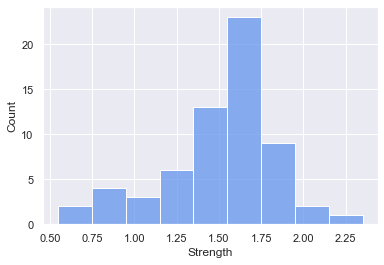

In [4]:
sns.histplot(
    data=fibres,
    x="Strength",
    binwidth=0.2,
    color="cornflowerblue")
plt.show()

### 2.3 Calculate a 100(1-a)% confidence interval for a population mean

#### 2.3.1 Using the data

Note that `param=a` should be the $\alpha$ in $100(1-\alpha)\%$

In [5]:
zconfint(x1=fibres["Strength"], alpha=0.05)

(1.4267882958081477, 1.5868624978426455)

#### 2.3.2 Using the values

If instead we have the values for the mean, standard deviation, and size (instead of some data), we could use `scipy.stats.norm` to calculate the confidence interval.

In [6]:
# get the parameters
{"mean" : fibres["Strength"].mean(),
 "std" : fibres["Strength"].std(),
 "size" : fibres["Strength"].size}

{'mean': 1.5068253968253966, 'std': 0.3241257491778182, 'size': 63}

In [7]:
# return the confidence interval
norm(loc=1.51, scale=0.324/sqrt(63)).interval(0.95)

(1.4299939505103554, 1.5900060494896446)

## 3. Confidence intervals for a proportion

**aim** : Calculate a 99% $z$-interval for the proportion of workers who suffered at least one accident at work.

**reference** : activity 18

**data** : accidents.csv

**description** : Number of accidents suffered by each of 414 machinists
over a period of time

### 3.1 Import the data

In [8]:
# import data
accidents = load.accidents()

### 3.2 Visualise the data

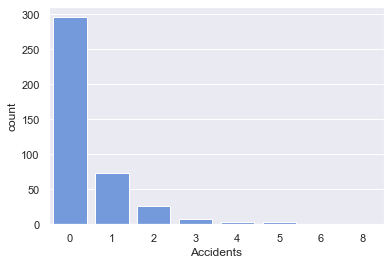

In [9]:
sns.countplot(
    data=accidents,
    x="Accidents",
    color="cornflowerblue")
plt.show()

### 3.3 Calculate a 100(1-a)% confidence interval for a proportion

In [10]:
# count number of entries where accidents != 0
x = accidents.query('Accidents != 0').count()[0]

In [11]:
# count the number of rows in totals
n = accidents["Accidents"].size

In [12]:
# return the confidence interval
proportion_confint(count=x, nobs=n, alpha=0.01)

(0.22787583995834104, 0.3421724692204029)

## 4. Confidence interval for the difference between two proportions

**aim** : Calculate a 95% $z$-interval for the difference between the proportion infected amog sewerage workers *with* and *without* children

**reference**: activity 20

**data** : sewer.csv

**description** : Occupational risk to sewerage workers of hepatitis
A infection though contact with raw sewage.

Relevant fields for this example:

- Immunity=`(0=no immunity, 1=immunity)`
- Children=`(0=no children, 2=children)`

### 4.1 Import the data

In [13]:
# import the data
sewer = load.sewer()

### 4.2 Visualise the data

In [14]:
# group the data and count
gsewer = sewer.groupby(["Immunity", "Children"]).count()
gsewer.reset_index(inplace=True)
gsewer.rename(columns={"Age": "Freq"}, inplace=True)

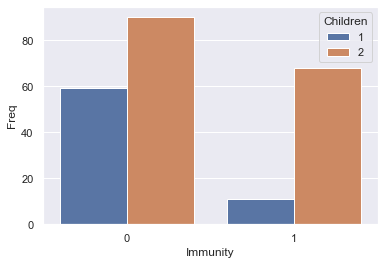

In [15]:
# plot the data
ax = sns.barplot(
    data=gsewer,
    x="Immunity",
    y="Freq",
    hue="Children")
plt.show()

### 4.3 Calculate a 100(1-a)% confidence interval for the difference between two proportions

In [16]:
# construct contingency table
pd.crosstab(
    index=sewer["Children"],
    columns=sewer["Immunity"],
    margins=True)

Immunity,0,1,All
Children,,,
1,59,11,70
2,90,68,158
All,149,79,228


Note, default actual argument for formal agument `method=newcomb` does not return the result expected in M248.

In [17]:
confint_proportions_2indep(
    count1=68,  # has children, has immunity
    nobs1=158,  # has children
    count2=11,  # no children, has immunity
    nobs2=70,   # no children
    method="wald")

(0.1582197356059404, 0.38825404377923145)